In [1]:
import pandas as pd  
import numpy as np  
from sklearn.preprocessing import Imputer 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {'Name': ['John','Paul', np.NaN, 'Wale', 'Mary', 'Carli', 'Steve'],
        'Age': [21,23,np.nan,19,25,np.nan,15],
        'Sex': ['M',np.nan,np.nan,'M','F','F','M'],
        'Goals': [5,10,np.nan,19,5,0,7],
        'Assists': [7,4,np.nan,9,7,6,4],
        'Value': [55,84,np.nan,90,63,15,46]}  

In [3]:
df=pd.DataFrame(data, columns =['Name','Age','Sex','Goals', 'Assists', 'Value'])

In [4]:
df.head(n=7)

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
1,Paul,23.0,NaN,10.0,4.0,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
5,Carli,NaN,F,0.0,6.0,15.0
6,Steve,15.0,M,7.0,4.0,46.0


## Deletion

In [5]:
#Drop all rows that have any column value missing. This is case deletion
df.dropna()

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
6,Steve,15.0,M,7.0,4.0,46.0


In [6]:
df=pd.DataFrame(data, columns =['Name','Age','Sex','Goals', 'Assists', 'Value'])

In [7]:
df.head(n=7)

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
1,Paul,23.0,NaN,10.0,4.0,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
5,Carli,NaN,F,0.0,6.0,15.0
6,Steve,15.0,M,7.0,4.0,46.0


In [8]:
df.dropna(how='all') #When all the values of a sample (here row) is nan

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
1,Paul,23.0,NaN,10.0,4.0,84.0
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
5,Carli,NaN,F,0.0,6.0,15.0
6,Steve,15.0,M,7.0,4.0,46.0


## Mean mode Median imputation

In [9]:
from sklearn.impute import SimpleImputer 

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
X = np.array([[1,2],
             [np.nan,3],
             [7,6]])

In [12]:
imp.fit(X) 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [13]:
print(imp.transform(X))      

[[1. 2.]
 [4. 3.]
 [7. 6.]]


In [14]:
imp.fit(df.to_numpy()[:,1].reshape(-1,1)) 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [15]:
print(imp.transform(df.to_numpy()[:,1].reshape(-1,1)))

[[21. ]
 [23. ]
 [20.6]
 [19. ]
 [25. ]
 [20.6]
 [15. ]]


## Univariate vs. Multivariate Imputation
One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

### Multivariate Imputation
At each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
X = np.array([[1, 2],
              [3, 6],
              [4, 8],
              [np.nan, 3],
              [7, np.nan]])


In [18]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)  
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)

print(np.round(imp.transform(X)))

[[ 1.  2.]
 [ 3.  6.]
 [ 4.  8.]
 [ 2.  3.]
 [ 7. 14.]]


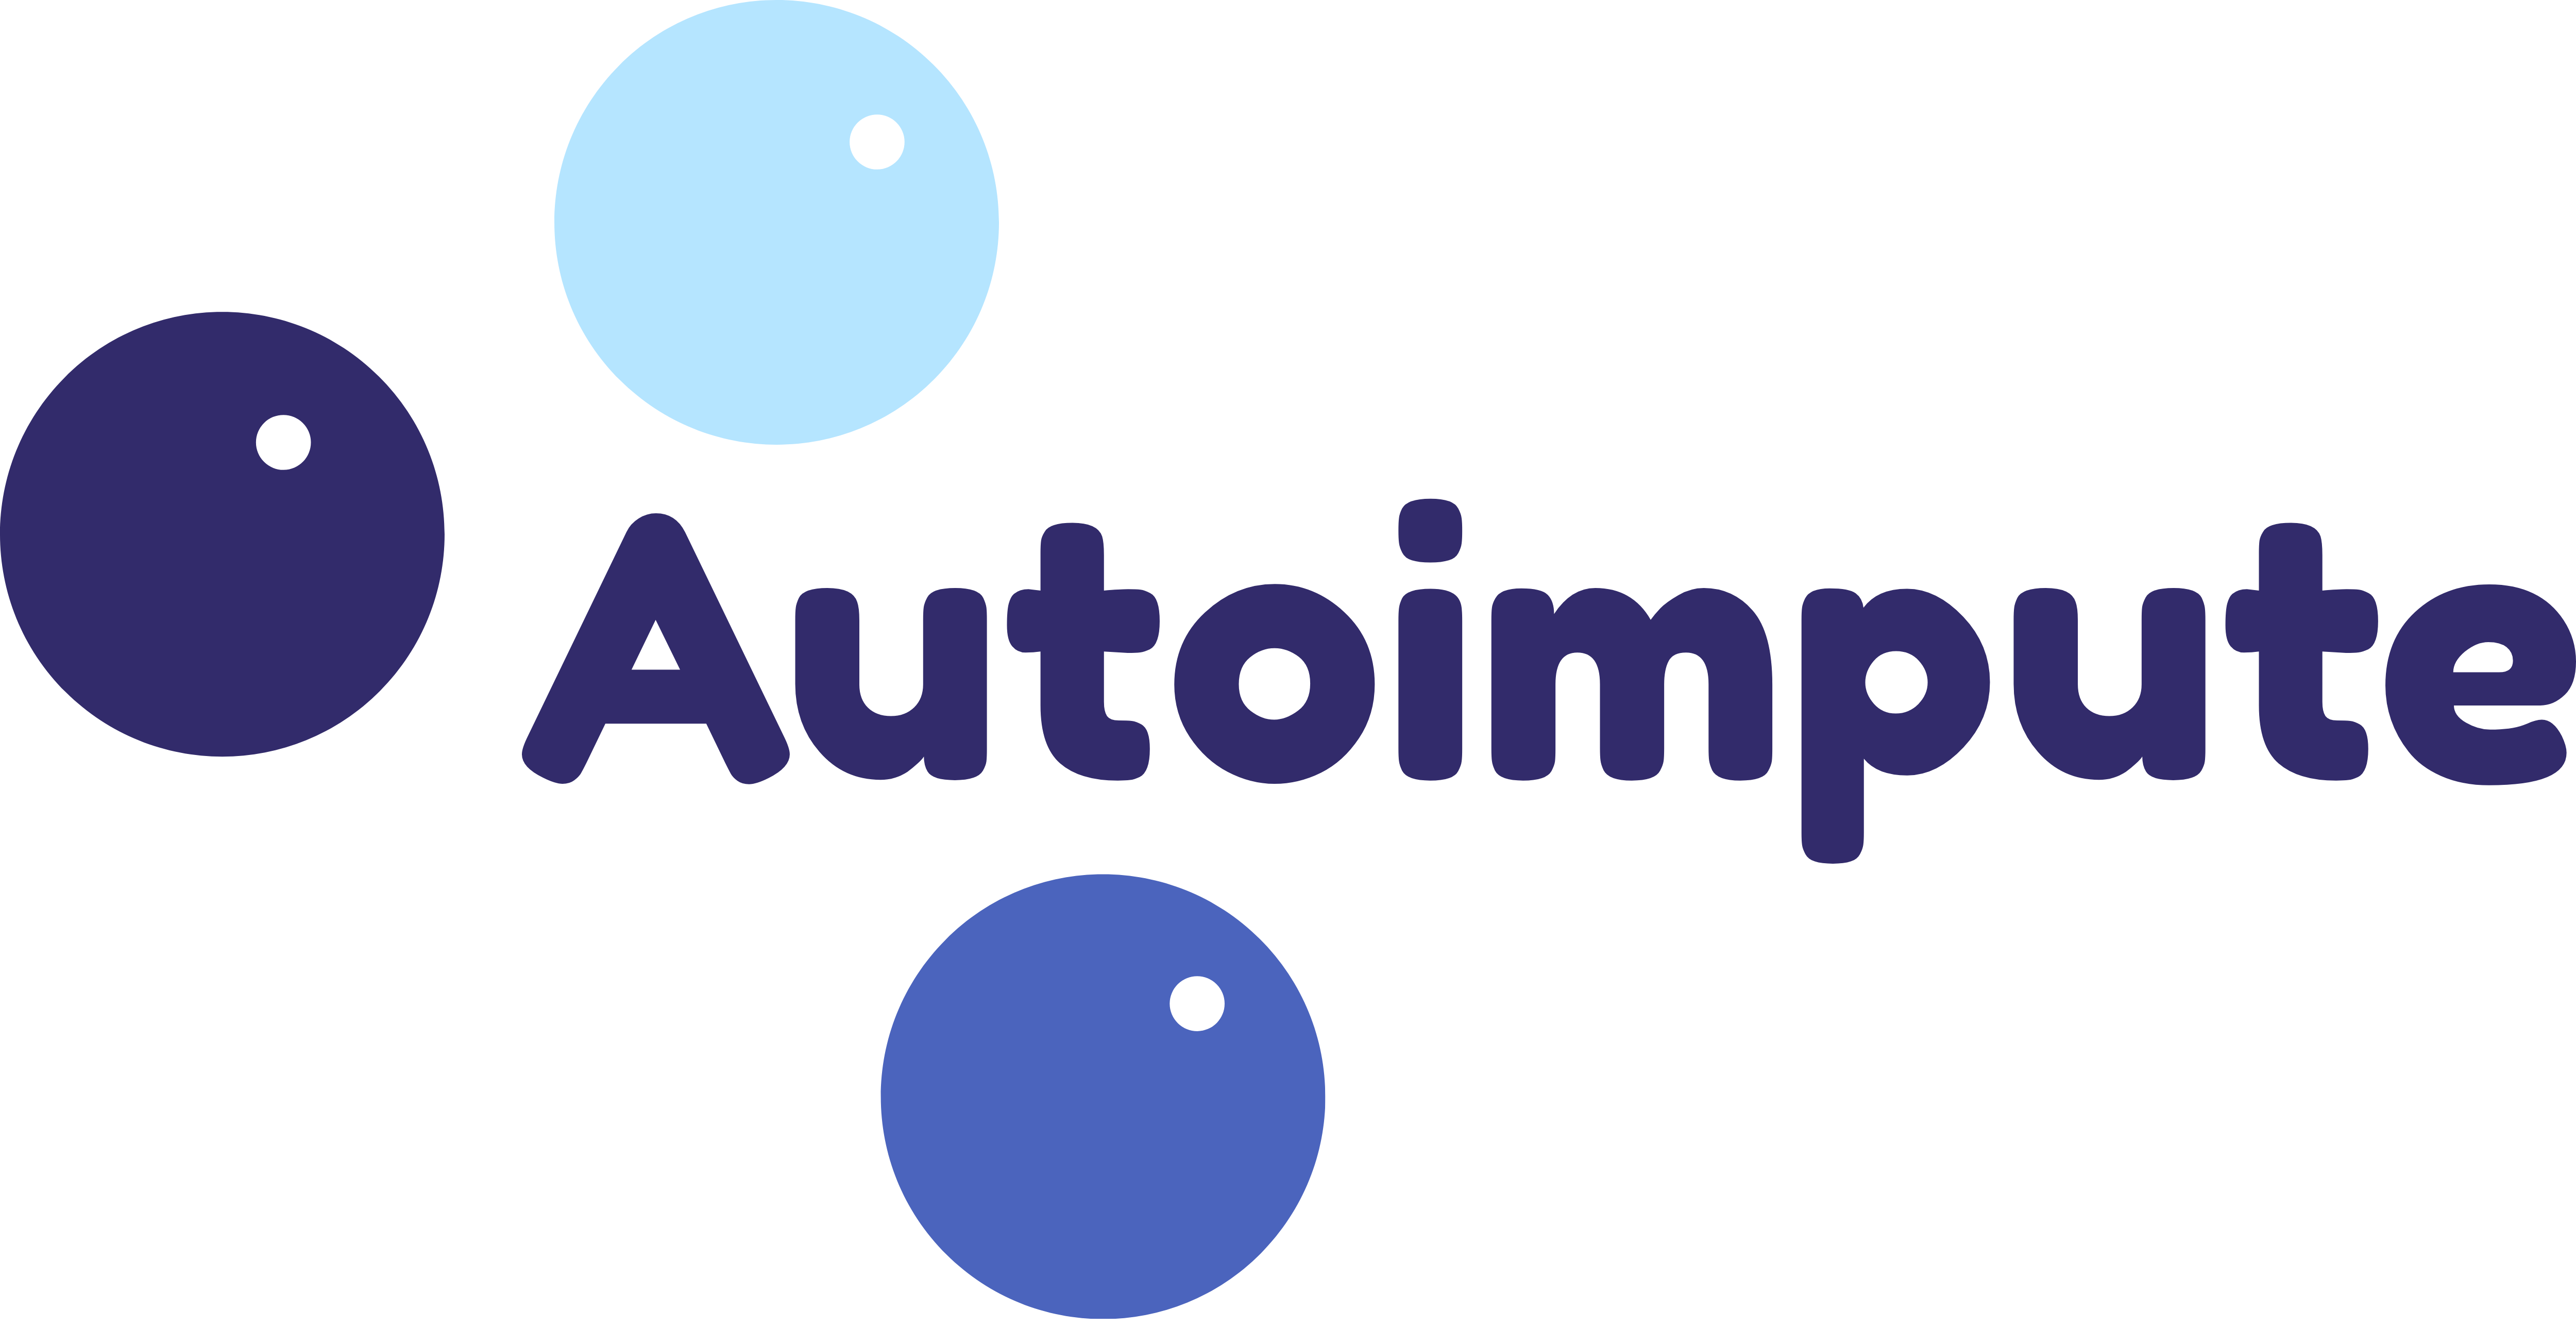

In [19]:
#!pip install autoImpute

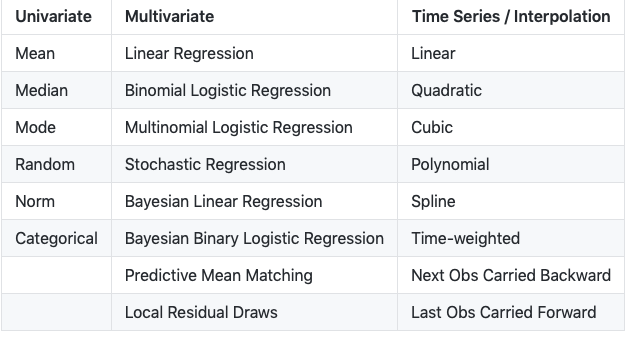

Two imputer classes
* SingleImputer  - imputation methods, passing through the data once
* MultipleImputer - imputation methods, passing through the data multiple times

In [20]:
#Toy dataset
toy_df = pd.DataFrame({
    "age": np.random.choice(np.arange(20,80), 50),
    "gender": np.random.choice(["Male","Female"], 50),
    "employment": np.random.choice(["Unemployed","Employed", "Part Time", "Self-Employed"], 50),
    "salary": np.random.choice(np.arange(50_000, 1_000_000), 50),
    "weight": np.random.choice(np.arange(100, 300, 0.1), 50),
})

In [21]:
toy_df.head()

,age,gender,employment,salary,weight
0,44,Female,Part Time,92154,102.9
1,70,Male,Employed,623236,209.3
2,47,Male,Employed,332387,226.8
3,61,Female,Part Time,166914,286.8
4,25,Female,Employed,836312,203.8


In [22]:
from autoimpute.imputations import SingleImputer
si = SingleImputer()
si.fit(toy_df)

SingleImputer(copy=True, imp_kwgs=None, predictors='all', seed=None,
              strategy='default predictive', visit='default')

In [23]:
si.statistics_

{'age': DefaultPredictiveImputer(cat_imputer=MultinomialLogisticImputer(),
                          cat_kwgs=None, num_imputer=PMMImputer(),
                          num_kwgs=None),
 'gender': DefaultPredictiveImputer(cat_imputer=MultinomialLogisticImputer(),
                          cat_kwgs=None, num_imputer=PMMImputer(),
                          num_kwgs=None),
 'employment': DefaultPredictiveImputer(cat_imputer=MultinomialLogisticImputer(),
                          cat_kwgs=None, num_imputer=PMMImputer(),
                          num_kwgs=None),
 'salary': DefaultPredictiveImputer(cat_imputer=MultinomialLogisticImputer(),
                          cat_kwgs=None, num_imputer=PMMImputer(),
                          num_kwgs=None),
 'weight': DefaultPredictiveImputer(cat_imputer=MultinomialLogisticImputer(),
                          cat_kwgs=None, num_imputer=PMMImputer(),
                          num_kwgs=None)}

### series-imputers
series-imputers are simply workers behind the scenes that implement a given imputation model.

In [24]:
# get the series imputer for employment column
emp_series_imputer = si.statistics_["employment"]
print(emp_series_imputer)

DefaultPredictiveImputer(cat_imputer=MultinomialLogisticImputer(),
                         cat_kwgs=None, num_imputer=PMMImputer(),
                         num_kwgs=None)


In [25]:
print(emp_series_imputer.cat_imputer)

MultinomialLogisticImputer()


In [26]:
print(emp_series_imputer.num_imputer)

PMMImputer()


In [27]:
print(list(SingleImputer().strategies.keys()))

['default predictive', 'least squares', 'stochastic', 'binary logistic', 'multinomial logistic', 'bayesian least squares', 'bayesian binary logistic', 'pmm', 'lrd', 'default univariate', 'default time', 'mean', 'median', 'mode', 'random', 'norm', 'categorical', 'interpolate', 'locf', 'nocb']


In [28]:
# string strategy broadcasts across all strategies
si_str = SingleImputer(strategy="mean")

# list strategy, where each item is a corresponding strategy
si_list = SingleImputer(strategy=["mean", "binary logistic", "median"])

# dictionary strategy, where we specify column and strategy together
# Note that with the dictionary, we can specify a SUBSET of columns to impute
si_dict = SingleImputer(strategy={"gender":"categorical", "salary": "pmm"})

In [29]:
# fitting with a single strategy
try:
    si_str.fit(toy_df)
except TypeError as te:
    print(f"{te.__class__.__name__}: {te}")

TypeError: mean not appropriate for Series gender of type object.


In [30]:
# fitting with a dictionaries of strategy
si_dict.fit(toy_df)

SingleImputer(copy=True, imp_kwgs=None, predictors='all', seed=None,
              strategy={'gender': 'categorical', 'salary': 'pmm'},
              visit='default')

### img_kwgs argument
When imp_kwgs is None, all series-imputers for given strategies use their default arguments.
img_kwgs argument control arguments to alter how the strategy ultimately works and performs.

possible values
* <b>neighbors</b> is the number of observations pmm will use to determine an imputation value.
* If <b>fill_value</b> is set to <b>random</b>, pmm randomly selects one of the n neighbors as the imputation. Random is the default.
* If the fill_value is set to <b>mean</b>, pmm takes the mean of the n neighbors and uses the mean as the imputation.


In [31]:
si_dict_col = SingleImputer(
    strategy={"gender":"categorical", "salary": "pmm", "weight": "pmm"},
    imp_kwgs={"salary": {"neighbors": 10, "fill_value": "mean"}}
)

In [32]:
si_dict_col.fit(toy_df)

SingleImputer(copy=True,
              imp_kwgs={'salary': {'fill_value': 'mean', 'neighbors': 10}},
              predictors='all', seed=None,
              strategy={'gender': 'categorical', 'salary': 'pmm',
                        'weight': 'pmm'},
              visit='default')

### Predictor argument
What all columns are used to build an imputation model for strategies that depend on predictors. We could also use a list or a dictionary to specify the predictors we want to use.

In [33]:
preds_list = ["weight", "age", "salary"]
si_list_pred = SingleImputer(predictors=preds_list)
print(si_list_pred)

print()

preds_dict = {"weight": ["age", "gender"], "salary": ["education", "age"]}
si_dict_pred = SingleImputer(predictors=preds_dict)
print(si_dict_pred)

SingleImputer(copy=True, imp_kwgs=None, predictors=['weight', 'age', 'salary'],
              seed=None, strategy='default predictive', visit='default')

SingleImputer(copy=True, imp_kwgs=None,
              predictors={'salary': ['education', 'age'],
                          'weight': ['age', 'gender']},
              seed=None, strategy='default predictive', visit='default')


In [64]:
from autoimpute.imputations import MultipleImputer

In [107]:
#Toy dataset
toy_df = pd.DataFrame({
    "age": np.random.choice(np.arange(20,80), 50),
    "gender": np.random.choice(["Male","Female"], 50),
    "education": np.random.choice(["Graduate","masters"], 50),
    "employment": np.random.choice(["Unemployed","Employed", "Part Time", "Self-Employed"], 50),
    "salary": np.random.choice(np.arange(50_000, 1_000_000), 50),
    "weight": np.random.choice(np.arange(100, 300, 0.1), 50),
})

In [108]:
toy_df

,age,gender,education,employment,salary,weight
0,78,Male,masters,Self-Employed,143700,148.8
1,35,Female,masters,Self-Employed,192503,294.9
2,56,Male,masters,Unemployed,918329,271.3
3,47,Female,masters,Unemployed,721209,294.7
4,57,Female,masters,Part Time,736538,270.4
5,51,Female,masters,Employed,750976,211.4
6,66,Female,masters,Part Time,531079,298.7
7,39,Female,masters,Part Time,598597,176.0
8,36,Male,masters,Unemployed,966993,194.3
9,25,Female,masters,Unemployed,180811,201.9


In [109]:
toy_df.loc[toy_df.sample(frac=0.1).index, 'gender'] =np.nan
print(toy_df)

    age  gender education     employment  salary  weight
0    78    Male   masters  Self-Employed  143700   148.8
1    35  Female   masters  Self-Employed  192503   294.9
2    56    Male   masters     Unemployed  918329   271.3
3    47  Female   masters     Unemployed  721209   294.7
4    57  Female   masters      Part Time  736538   270.4
5    51  Female   masters       Employed  750976   211.4
6    66  Female   masters      Part Time  531079   298.7
7    39  Female   masters      Part Time  598597   176.0
8    36    Male   masters     Unemployed  966993   194.3
9    25     NaN   masters     Unemployed  180811   201.9
10   77    Male   masters  Self-Employed  623696   172.9
11   59    Male  Graduate       Employed  640709   283.4
12   24  Female  Graduate      Part Time  402816   259.8
13   39    Male  Graduate      Part Time  106401   175.3
14   58  Female   masters      Part Time  138380   163.7
15   67  Female  Graduate  Self-Employed  341592   153.6
16   47     NaN   masters      

In [110]:
# imp = MultipleImputer(
#     n=2,
#     strategy={"salary": "pmm", "gender": "bayesian binary logistic", "age": "norm"},
#     predictors={"salary": "all", "gender": ["salary", "education", "weight"]},
#     imp_kwgs={"pmm": {"fill_value": "random"}},
#     visit="left-to-right",
#     return_list=True
# )

imp = MultipleImputer(
    n=1,
    strategy={"gender": "bayesian binary logistic"},
    predictors={"salary": "all", "gender": ["salary", "education", "weight"]},
    imp_kwgs={"pmm": {"fill_value": "random"}},
    visit="left-to-right",
    return_list=True
)


# Because we set return_list=True, imputations are done all at once, not evaluated lazily.
# This will return M*N, where M is the number of imputations and N is the size of original dataframe.
toy_df_full = imp.fit_transform(toy_df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 8000/8000 [03:03<00:00, 43.60draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [111]:
imps = pd.concat([toy_df_full[i][1]["gender"].to_frame() for i in range(len(toy_df_full))], axis=1)
conc = pd.concat([toy_df[['age','gender']], imps], axis=1)
#conc.columns = ["age",  "gender", "education","employment",  "salary",  "weight", "gender_1", "gender_2"]
conc.columns = ["age", "gender", "gender_1"]

In [133]:
print(conc)

    age  gender gender_1
0    78    Male     Male
1    35  Female   Female
2    56    Male     Male
3    47  Female   Female
4    57  Female   Female
5    51  Female   Female
6    66  Female   Female
7    39  Female   Female
8    36    Male     Male
9    25     NaN     Male
10   77    Male     Male
11   59    Male     Male
12   24  Female   Female
13   39    Male     Male
14   58  Female   Female
15   67  Female   Female
16   47     NaN     Male
17   49    Male     Male
18   32    Male     Male
19   46  Female   Female
20   31    Male     Male
21   40     NaN     Male
22   77    Male     Male
23   58    Male     Male
24   77  Female   Female
25   33  Female   Female
26   26    Male     Male
27   57    Male     Male
28   34  Female   Female
29   38    Male     Male
30   77  Female   Female
31   45     NaN     Male
32   35    Male     Male
33   42  Female   Female
34   71  Female   Female
35   75    Male     Male
36   21  Female   Female
37   68  Female   Female
38   39  Female   Female


In [134]:
imp.imputed_.keys()

dict_keys(['gender'])

### Exploring Missingness of the data

In [144]:
from autoimpute.visuals import plot_md_percent, plot_md_locations

In [145]:
#Toy dataset
toy_df = pd.DataFrame({
    "age": np.random.choice(np.arange(20,80), 50),
    "gender": np.random.choice(["Male","Female"], 50),
    "education": np.random.choice(["Graduate","masters"], 50),
    "employment": np.random.choice(["Unemployed","Employed", "Part Time", "Self-Employed"], 50),
    "salary": np.random.choice(np.arange(50_000, 1_000_000), 50),
    "weight": np.random.choice(np.arange(100, 300, 0.1), 50),
})

In [146]:
toy_df.loc[toy_df.sample(frac=0.2).index, 'gender'] =np.nan
toy_df.loc[toy_df.sample(frac=0.2).index, 'salary'] =np.nan
toy_df.loc[toy_df.sample(frac=0.2).index, 'age'] =np.nan
print(toy_df)

     age  gender education     employment    salary  weight
0    NaN    Male  Graduate      Part Time  243972.0   131.3
1    NaN    Male  Graduate     Unemployed       NaN   174.4
2   59.0  Female  Graduate      Part Time  392980.0   122.9
3   58.0  Female  Graduate      Part Time  519416.0   259.8
4   41.0  Female   masters      Part Time       NaN   133.6
5   71.0    Male  Graduate  Self-Employed  627225.0   163.0
6   66.0  Female   masters  Self-Employed       NaN   226.4
7   65.0    Male   masters     Unemployed  907906.0   161.6
8    NaN     NaN   masters  Self-Employed  522283.0   175.3
9   36.0    Male  Graduate       Employed  303347.0   223.1
10  34.0    Male   masters      Part Time       NaN   109.3
11  32.0    Male  Graduate  Self-Employed  340407.0   276.6
12  74.0  Female   masters     Unemployed  657183.0   158.7
13  45.0    Male  Graduate     Unemployed  797288.0   290.1
14  39.0     NaN  Graduate       Employed  152174.0   172.6
15   NaN  Female  Graduate       Employe

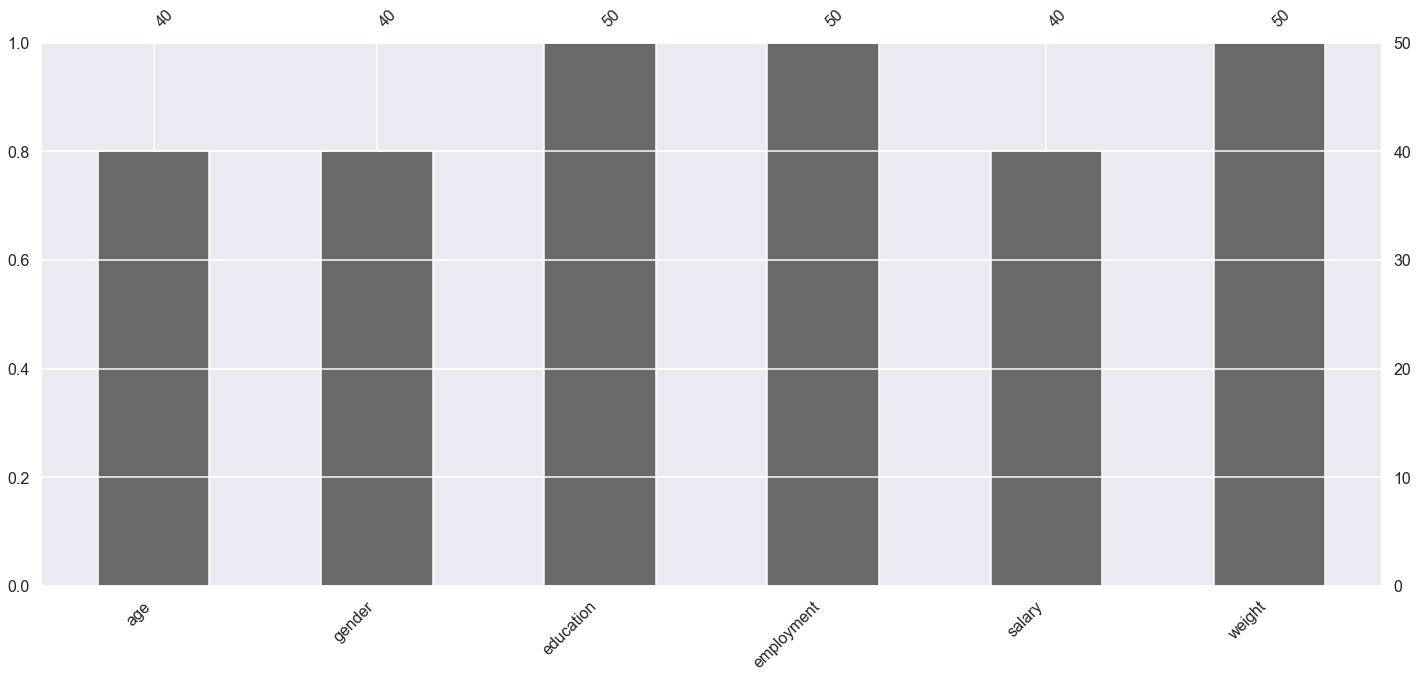

In [147]:
plot_md_percent(toy_df)

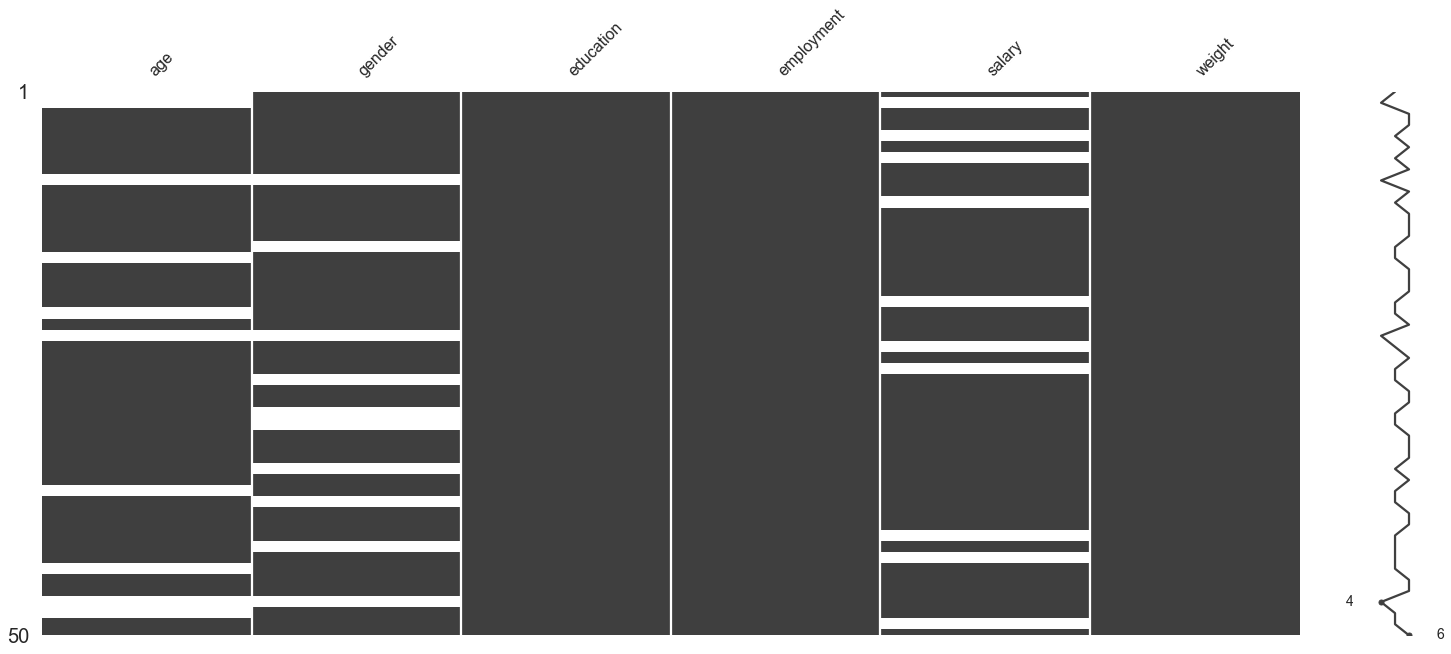

In [148]:
plot_md_locations(toy_df)